## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

## Data Collection and Analysis

In [2]:
df =pd.read_csv('Advertising.csv')

In [3]:
# Show first 5 rows of dataset

df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Delete unwanted column 'Unnamed: 0'

df.drop(columns="Unnamed: 0",inplace=True)

In [5]:
# Show 10 rows randomly after deleting the column 'Unnamed: 0'

df.sample(10)

,TV,radio,newspaper,sales
75,16.9,43.7,89.4,8.7
73,129.4,5.7,31.3,11.0
137,273.7,28.9,59.7,20.8
77,120.5,28.5,14.2,14.2
100,222.4,4.3,49.8,11.7
129,59.6,12.0,43.1,9.7
193,166.8,42.0,3.6,19.6
22,13.2,15.9,49.6,5.6
30,292.9,28.3,43.2,21.4
186,139.5,2.1,26.6,10.3


In [6]:
# Check the size (Row x Columns) of dataset

df.shape

(200, 4)

In [7]:
# Check Data types of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
# Statistical details about dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
# Check missing values in dataset

df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

## Data Visualization

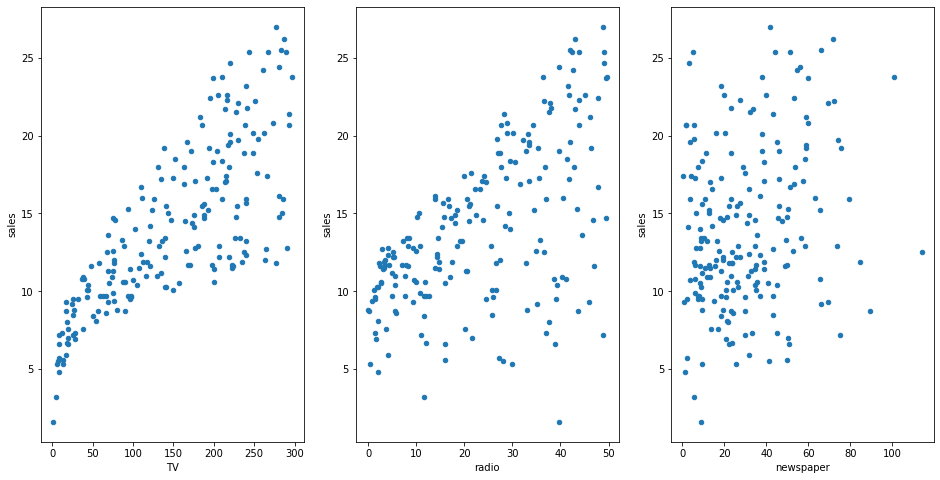

In [10]:
# Plot [(TV vs. Sales), (Radio vs. Sales) and (Newspaper vs. Sales) ]

fig, axs = plt.subplots(1, 3)
df.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])
fig.savefig('adversting.jpg')

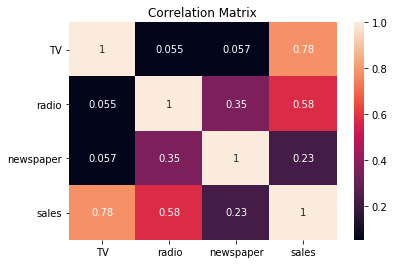

In [11]:
# Heatmap

sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Matrix")
plt.show()

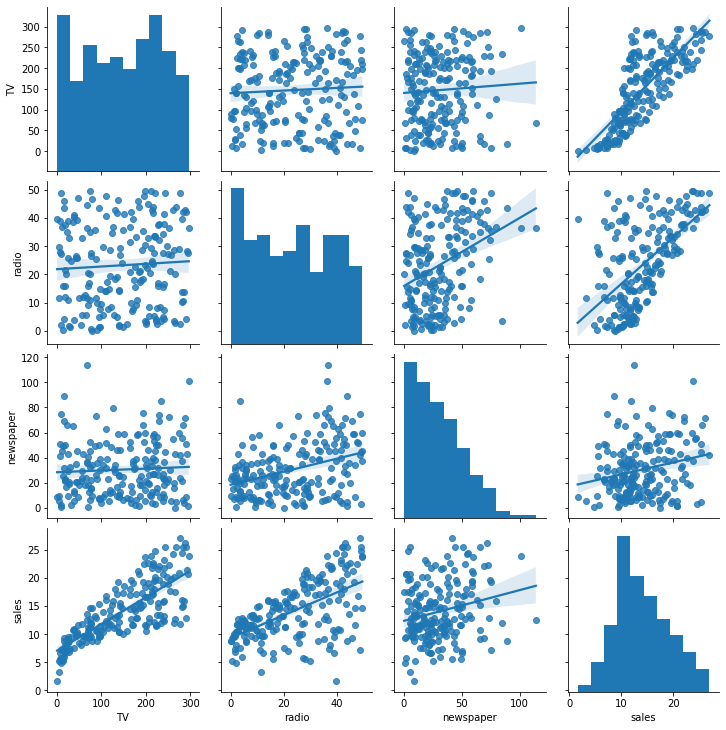

In [12]:
# Regression Plots

sns.pairplot(df, kind="reg")

## Multiple Linear Regression

In [13]:
# Intializing the variable

x = df.drop(['sales'], axis=1)
y = df['sales']

In [14]:
# Spliting dataset into Training and Test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [15]:
# Fitting Linear Regression to Training set

from sklearn.linear_model import LinearRegression
LR = LinearRegression ()
LR.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Predictiong the Test set result

y_pred = LR.predict(x_test)

In [17]:
#Print intercept and coefficients

print (LR.intercept_)
print (LR.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [18]:
# Calculating the R Squared value

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9035619145344695

In [19]:
# Calculating the MSE value

from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, y_pred)

3.0439325516617832

In [20]:
# Cross validation

from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Linear Regression model:", scr.mean())

Cross validation score of Linear Regression model: 0.8871063495438435


In [21]:
# Saving the model

import joblib
joblib.dump(LR, "LR_Advertising.pkl")

['LR_Advertising.pkl']